In [ ]:
%%capture

!pip install drawdata

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from drawdata import ScatterWidget

### ***OBTAINING DATA***

`drawdata` offers an interactive way to build your own `pandas` dataset. Can you make your data ***linearly separable***?

In [ ]:
widget = ScatterWidget()
widget

ScatterWidget()

In [ ]:
data = widget.data_as_pandas
data.head(2)

,x,y,color,label
0,351.822409,294.948439,#1f77b4,a
1,373.102066,315.408191,#1f77b4,a


### ***DATA PREPROCESSING***

Do you see any issues with our current data? Here, we'll take the following preprocessing steps:

1. Remove the `color` column
2. Label encode `label` column
3. Randomize dataset (smartly)

In [ ]:
label_map = {"a": 0, "b": 1, "c": 2, "d": 3}
data['label'] = data['label'].map(label_map)

data = data.sample(frac=1)
data = data.drop('color', axis=1)

X = data[['x', 'y']].to_numpy()
y = data[['label']].to_numpy()

data.head(2)

,x,y,label
33,378.002182,267.517005,0
15,404.528561,330.273392,0


### ***ACTIVATION FUNCTIONS***

What is an activation function? Why are they useful? Can you recreate `relu` using `np.maximum`?

In [ ]:
def relu(x):
  return np.maximum(0, x)

def relu_deriv(x):
  return np.where(x > 0, 1, 0)

### ***NN ARCHITECTURE***

Our network will have:

- 2 inputs (`x`, `y`)
- 1 hidden layer
- 1 output (predicted `color`)

To do this, we must `init_params`, and `train` them by repeatedly passing them through the `forward_pass` and updating those parameters via gradient descent in the `backward_pass`.

In [ ]:
def init_params(input_size, hidden_size, output_size):
  W1 = np.random.uniform(-0.01, 0.01, size=(input_size, hidden_size))
  b1 = np.zeros(hidden_size)

  W2 = np.random.uniform(-0.01, 0.01, size=(hidden_size, output_size))
  b2 = np.zeros(output_size)

  return W1, b1, W2, b2

In [ ]:
def forward_pass(X, W1, b1, W2, b2):
  Z1 = np.dot(X, W1) + b1
  A1 = relu(Z1)

  Z2 = np.dot(A1, W2) + b2

  return Z2, Z1, A1

def backward_pass(X, y, Z1, A1, Z2, W1, W2):
  dz2 = Z2 - y
  dW2 = np.dot(A1.T, dz2)
  db2 = np.sum(dz2, axis=0)

  da1 = np.dot(dz2, W2.T)
  dz1 = da1 * relu_deriv(Z1)
  dW1 = np.dot(X.T, dz1)
  db1 = np.sum(dz1, axis=0)

  return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, lr):
  W1 -= lr * dW1
  b1 -= lr * db1

  W2 -= lr * dW2
  b2 -= lr * db2

  return W1, b1, W2, b2

In [ ]:
def show_history(epochs, history):
  plt.figure(figsize=(10, 6))
  plt.plot(range(epochs), history, label='Loss', marker='o', markersize=6, color='b', linewidth=2, linestyle='-', alpha=0.7)
  plt.title('Loss History', fontsize=20, weight='bold', color='darkblue')
  plt.xlabel('Iteration', fontsize=16, weight='bold', color='darkblue')
  plt.ylabel('Loss', fontsize=16, weight='bold', color='darkblue')
  plt.grid(True, linestyle='--', alpha=0.5)
  plt.legend(fontsize=14)
  plt.tight_layout()
  plt.show()

def train(X, y, W1, b1, W2, b2, lr, epochs):
  history = []
  for epoch in range(epochs):
    # Forward pass
    Z2, Z1, A1 = forward_pass(X, W1, b1, W2, b2)

    # Compute loss (Mean Squared Error)
    loss = np.mean((Z2 - y) ** 2)
    history.append(loss)

    # Backward pass
    dW1, db1, dW2, db2 = backward_pass(X, y, Z1, A1, Z2, W1, W2)

    # Update parameters
    W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, lr)

  show_history(epochs, history)

  return W1, b1, W2, b2

### ***TRAIN NETWORK & PLOT RESULTS***

In [ ]:
INPUT_SIZE = 2
OUTPUT_SIZE = 1

hidden_size = 3
lr = 0.0001
iterations = 200

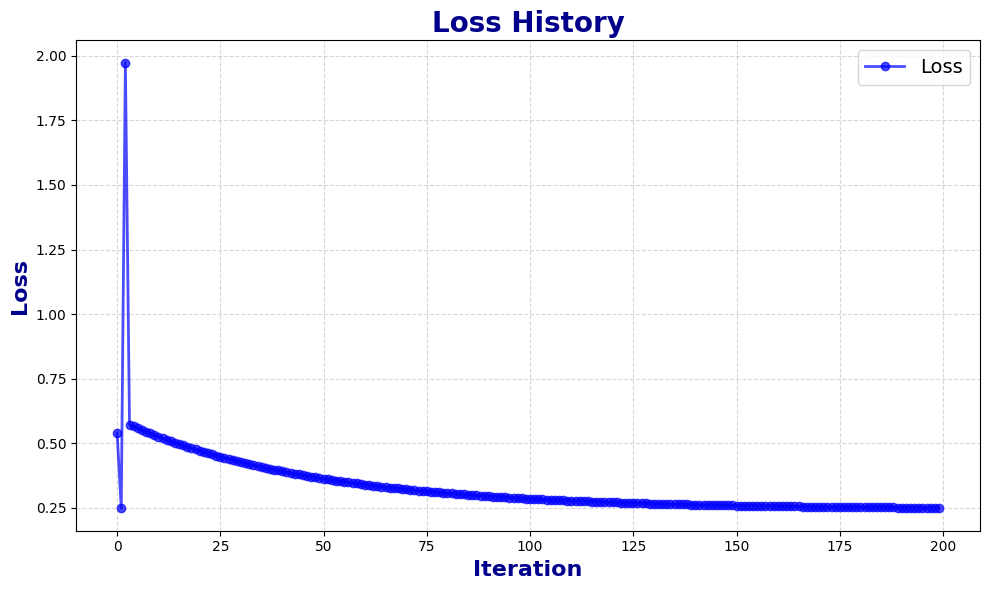

In [ ]:
# Initialize parameters
W1, b1, W2, b2 = init_params(INPUT_SIZE, hidden_size, OUTPUT_SIZE)

# Train the model
W1, b1, W2, b2 = train(X, y, W1, b1, W2, b2, lr, iterations)

In [ ]:
widget2 = ScatterWidget()
widget2

ScatterWidget()

In [ ]:
data2 = widget2.data_as_pandas
data2['label'] = data2['label'].map(label_map)
data2 = data2.sample(frac=1)

X2 = data2[['x', 'y']].to_numpy()
y2 = data2[['label']].to_numpy()

In [ ]:
train_size = int(len(X2) * 0.80)

X_train2, y_train2 = X2[:train_size,], y2[:train_size,]
X_test2, y_test2 = X2[train_size:,], y2[train_size:,]

In [ ]:
def predict(X, W1, b1, W2, b2):
  Z2, _, _ = forward_pass(X, W1, b1, W2, b2)
  predictions = np.round(Z2).astype(int)

  label_map = {0: "a", 1: "b", 2: "c", 3: "d"}
  predictions = np.vectorize(label_map.get)(predictions)

  return predictions

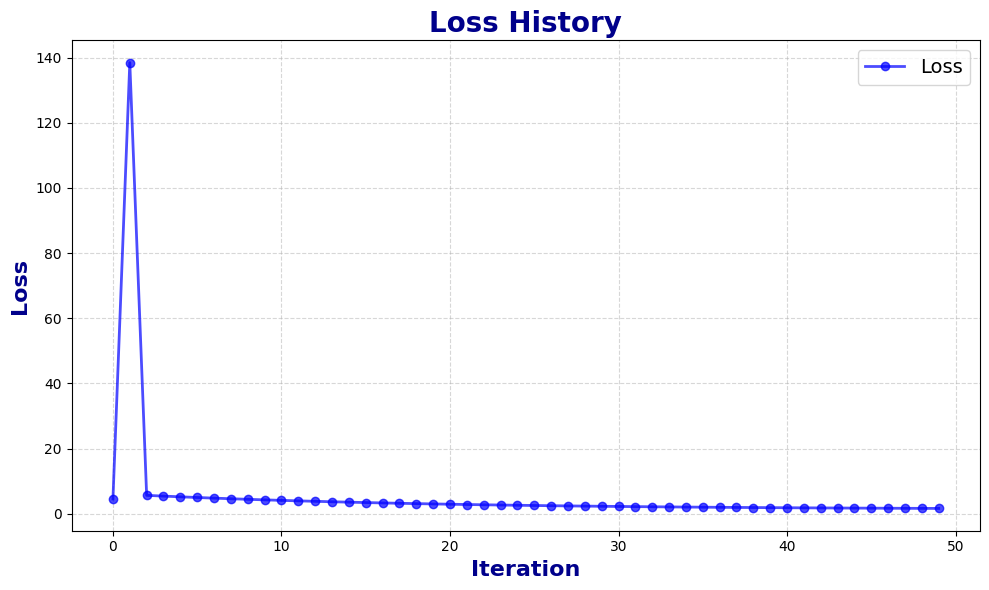

In [ ]:
hidden_size = 5
lr = 0.0001
iterations = 50

W3, b3, W4, b4 = init_params(INPUT_SIZE, hidden_size, OUTPUT_SIZE)
W3, b3, W4, b4 = train(X_train2, y_train2, W3, b3, W4, b4, lr, iterations)

In [ ]:
def accuracy(y_true, y_pred):
  y_true = np.round(y_true).astype(int)

  label_map = {0: "a", 1: "b", 2: "c", 3: "d"}
  y_true = np.vectorize(label_map.get)(y_true)

  accuracy = np.sum(y_true == y_pred) / len(y_true)

  return accuracy

accuracy(y_test2, predict(X_test2, W3, b3, W4, b4))

0.27941176470588236